In [1]:
import numpy as np
import matplotlib.pylab as plt
import math as math
from scipy.optimize import fmin
from iminuit import Minuit, describe, Struct

%matplotlib  notebook



In [2]:
# Add code to the following function so that it takes in two datasets, loops over one of them, and finds
# information about the nearest neighbors in the other dataset, based on a flag. 

def nn(data0,data1,r=None,nneighbors=None):
    
    ret = -1
    ret_list=[]
    if r is not None and nneighbors is not None:
        exit(-1)
        return ret
    elif r is not None and nneighbors is None:
        for num0 in data0:
            count=0
            diff = np.abs(num0 - data1)
            count = len(diff[diff<r])
            ret_list.append(float(count)/(float(len(data1))*r))
        ret_list = np.array(ret_list)
        return ret_list
    elif r is None and nneighbors is not None:
        for num0 in data0:
            diff = np.abs(num0 - data1)
            diff.sort()
            radius= diff[nneighbors-1]
            ret_list.append(1/radius)
        ret_list = np.array(ret_list)
        return ret_list
    return ret

In [38]:
def normal(x,mean,width):
    return (1.0/(width*np.sqrt(2*np.pi)))*(np.exp(-(x-mean)**2/(2*(width**2))))

def calc_pull(iterations, dataPoints, MC, rad):
    pull_mean_list=[]
    pull_width_list=[]
    pull_frac_list=[]
    average_best_mean = average_best_width = average_best_frac = 0
    means = []
    widths = []
    frac = []
    fit_means = []
    fit_widths = []
    fit_frac = []
    fit_means_uncert = []
    fit_widths_uncert = []
    fit_frac_uncert = []
    
    

    for num in range(iterations):
        #Nsig = np.random.poisson(300)
        Nsig = dataPoints
        sig_mean=10.4
        sig_width=.06
        signal = np.random.normal(sig_mean,sig_width,Nsig)
        Nbkg = 1000
        background = 9.0+(2*np.random.random(Nbkg))
        data = signal.copy()
        data = np.append(data,background.copy())
        means.append(sig_mean)
        widths.append(sig_width)
        frac.append(float(Nsig)/(float(Nbkg)+float(Nsig)))
        
        #plt.figure()
        #plt.hist(data,bins=50)

        #Nsig_compare=np.random.poisson(5000)
        Nsig_compare = MC
        sig_mean_compare=10.4
        sig_width_compare = .06
        signal_compare = np.random.normal(sig_mean_compare,sig_width_compare,Nsig_compare)
        
        Nbkg_compare= MC
        background_compare= 9.0+(2*np.random.random(Nbkg_compare))
        '''
        plt.figure()
        plt.subplot(1,2,1)
        plt.hist(signal_compare,bins=50,range=(9,11))
        plt.subplot(1,2,2)
        plt.hist(background_compare,bins=50,range=(9,11))
        '''
        #plt.figure()
        #plt.hist(signal_compare)
        #plt.hist(testing_with_signal, bins=50)
        #plt.hist(testing_with_background, bins=50)
        
        def probability(frac):
            tot_prob=[]
            #signal_prob=nn(data,signal_compare, nneighbors=100)
            #background_prob= nn(data, background_compare, nneighbors=100)
            signal_prob=nn(data,signal_compare, r=rad)
            background_prob= nn(data, background_compare, r=rad)
            #signal_prob=np.array(signal_prob)
            #background_prob=np.array(background_prob)
            tot_prob.append(frac*signal_prob+ ((1-frac)*background_prob))
            tot_prob=np.array(tot_prob)
            #tot_prob[np.isnan(tot_prob)]=0.000001

            return -np.log(tot_prob[tot_prob>0]).sum()
        
        m=Minuit(probability, frac= .50, limit_frac=(0.001,1), error_frac=0.001,  errordef = 0.5, print_level=0)
        m.migrad()
        if (m.get_fmin().is_valid):
            param=m.values
            err=m.errors
            fit_frac.append(param["frac"])
            fit_frac_uncert.append(err["frac"])
            pull_frac=((float(Nsig)/(float(Nbkg)+float(Nsig)))-param["frac"])/err["frac"]
            pull_frac_list.append(pull_frac)
                
                #plt.figure()
                #plt.hist(data,bins=100)

    #return [pull_mean_list,pull_width_list,pull_frac_list],[means,widths,frac],[fit_means,fit_widths,fit_frac],[fit_means_uncert,fit_widths_uncert, fit_frac_uncert],iterations
    return pull_frac_list, frac, fit_frac, fit_frac_uncert,iterations

number of signal points: 50 	 number of MC point: 1000 	radius: 0.01


<IPython.core.display.Javascript object>


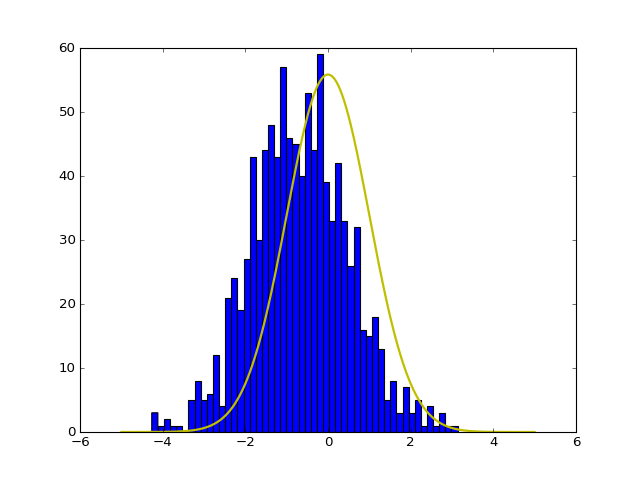

number of signal points: 50 	 number of MC point: 1000 	radius: 0.05


<IPython.core.display.Javascript object>


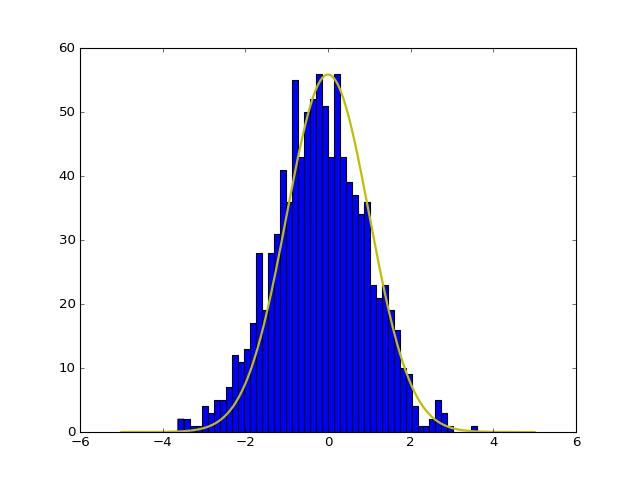

number of signal points: 50 	 number of MC point: 1000 	radius: 0.1


<IPython.core.display.Javascript object>


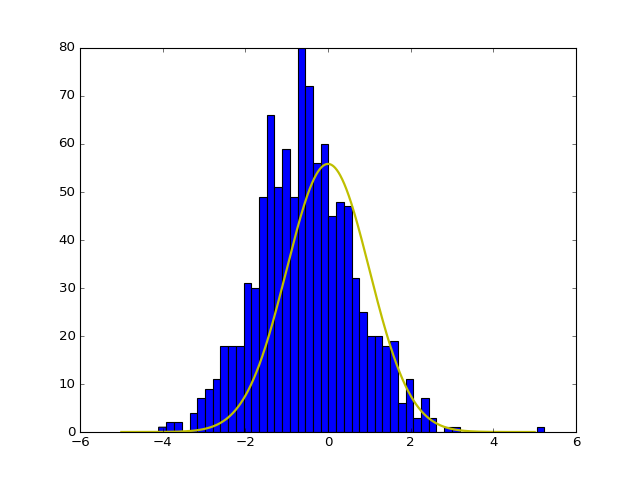

number of signal points: 50 	 number of MC point: 1000 	radius: 0.2


<IPython.core.display.Javascript object>


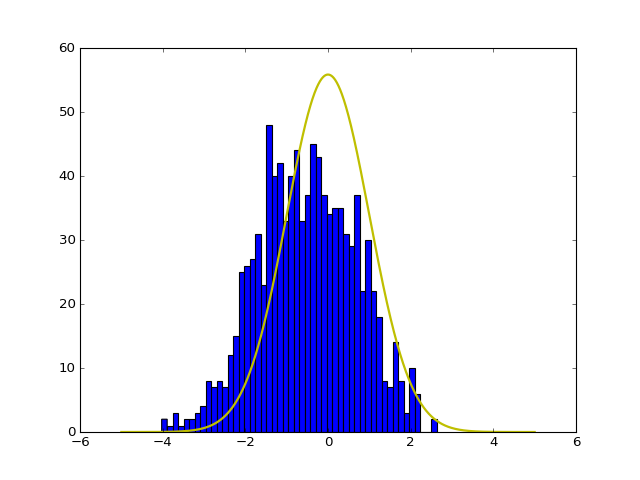

number of signal points: 50 	 number of MC point: 1000 	radius: 0.5


<IPython.core.display.Javascript object>


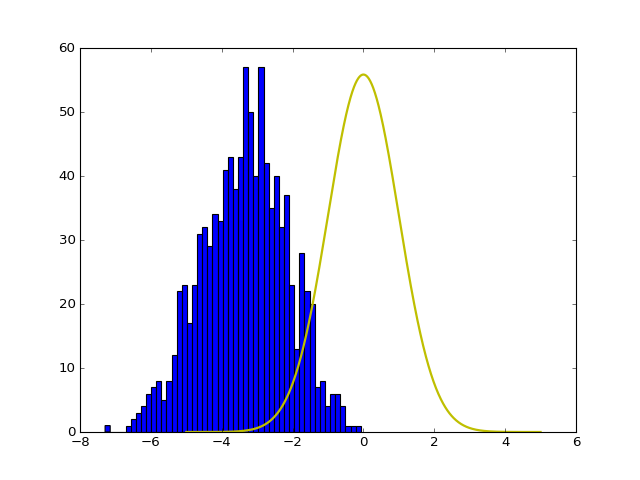

number of signal points: 50 	 number of MC point: 5000 	radius: 0.01


<IPython.core.display.Javascript object>


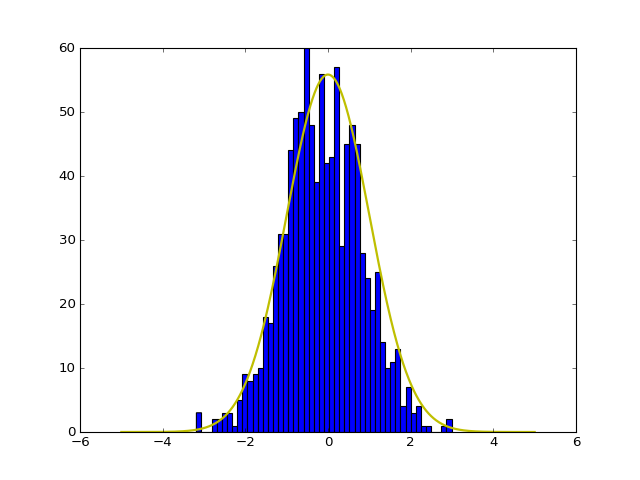

number of signal points: 50 	 number of MC point: 5000 	radius: 0.05


<IPython.core.display.Javascript object>


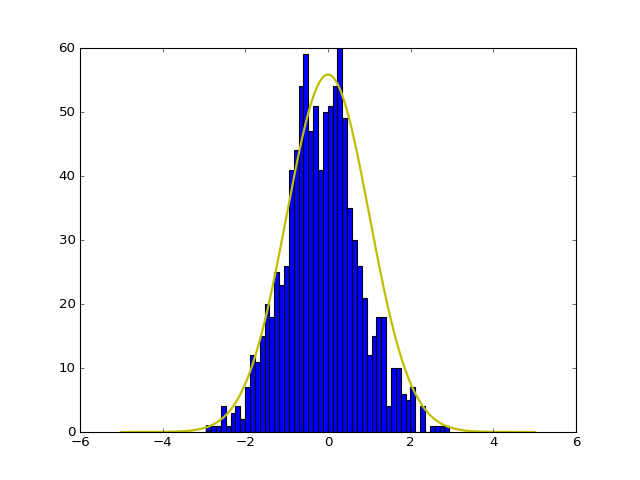

number of signal points: 50 	 number of MC point: 5000 	radius: 0.1


<IPython.core.display.Javascript object>


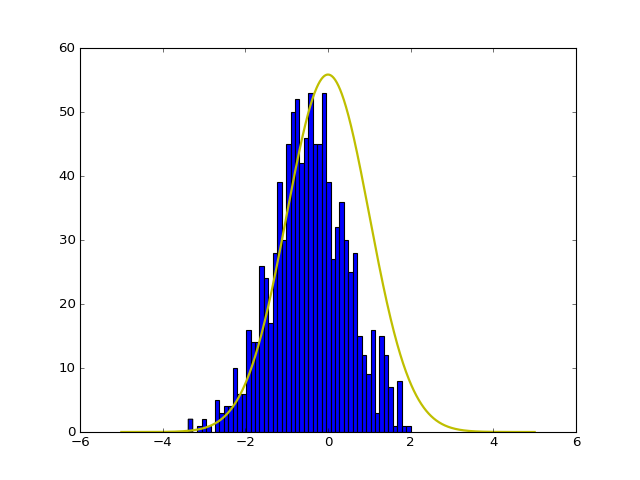

number of signal points: 50 	 number of MC point: 5000 	radius: 0.2


<IPython.core.display.Javascript object>


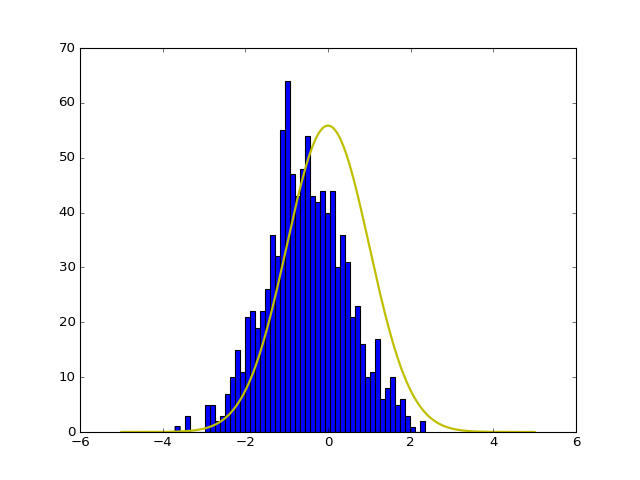

number of signal points: 50 	 number of MC point: 5000 	radius: 0.5


<IPython.core.display.Javascript object>


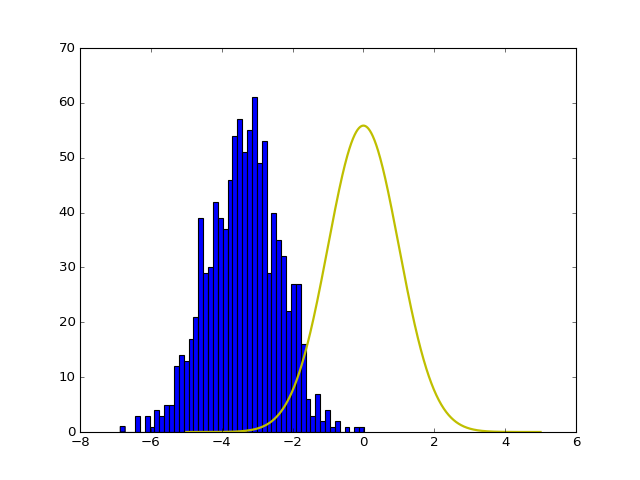

number of signal points: 50 	 number of MC point: 10000 	radius: 0.01


<IPython.core.display.Javascript object>


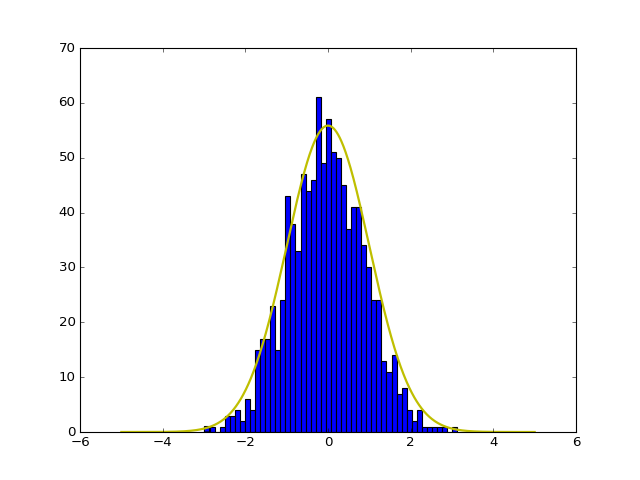

number of signal points: 50 	 number of MC point: 10000 	radius: 0.05


<IPython.core.display.Javascript object>


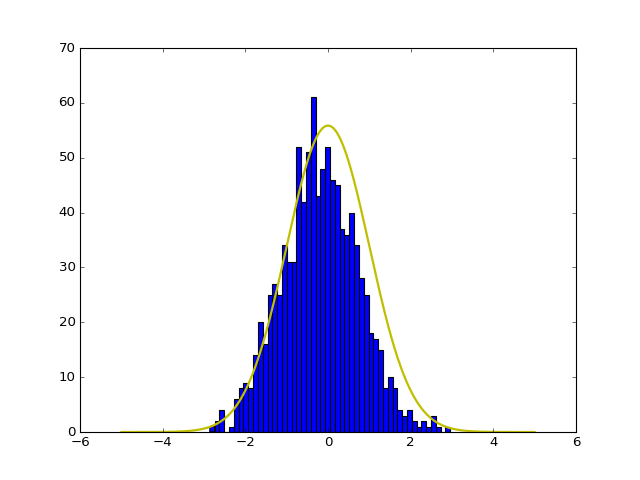

number of signal points: 50 	 number of MC point: 10000 	radius: 0.1


<IPython.core.display.Javascript object>


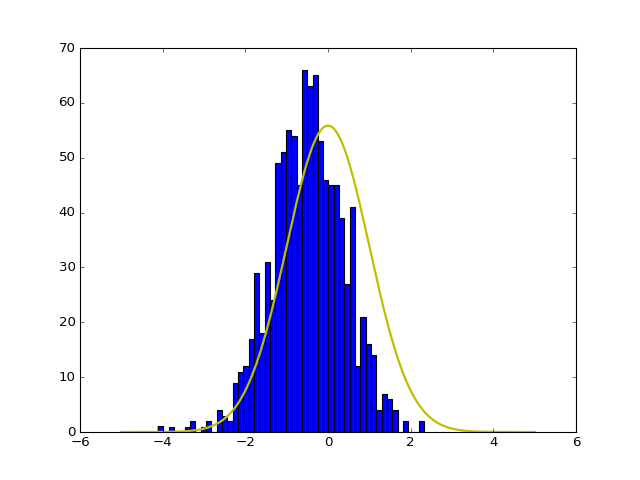

number of signal points: 50 	 number of MC point: 10000 	radius: 0.2


<IPython.core.display.Javascript object>


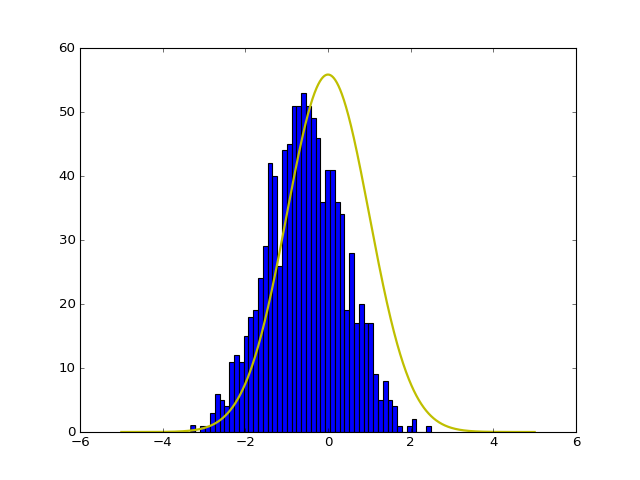

number of signal points: 50 	 number of MC point: 10000 	radius: 0.5


<IPython.core.display.Javascript object>


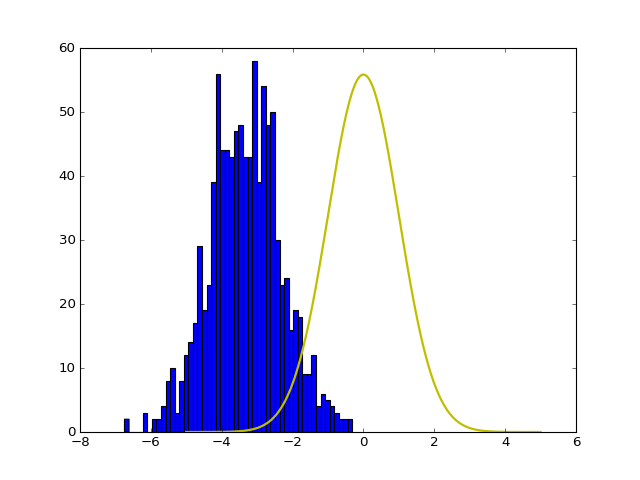

number of signal points: 150 	 number of MC point: 1000 	radius: 0.01


<IPython.core.display.Javascript object>


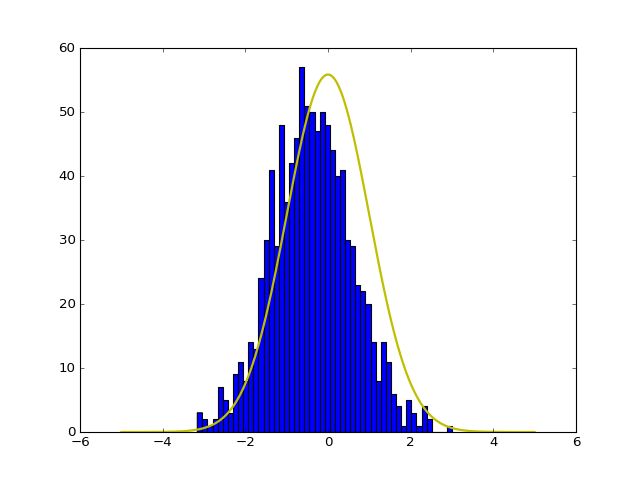

number of signal points: 150 	 number of MC point: 1000 	radius: 0.05


<IPython.core.display.Javascript object>


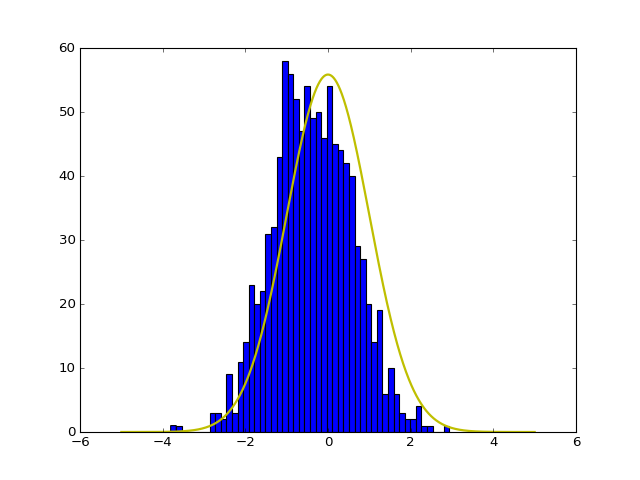

number of signal points: 150 	 number of MC point: 1000 	radius: 0.1


<IPython.core.display.Javascript object>


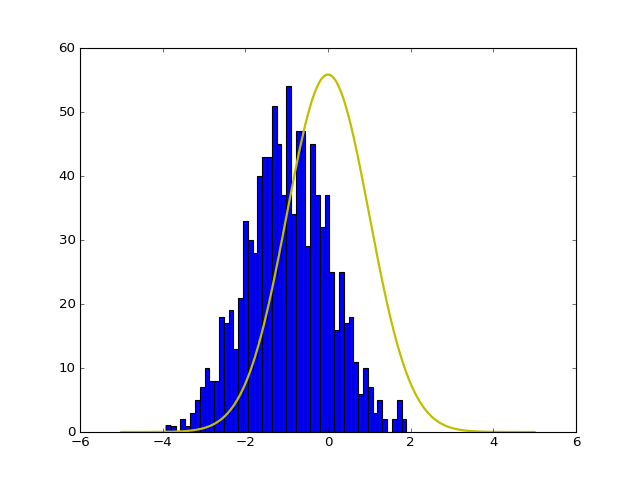

number of signal points: 150 	 number of MC point: 1000 	radius: 0.2


<IPython.core.display.Javascript object>


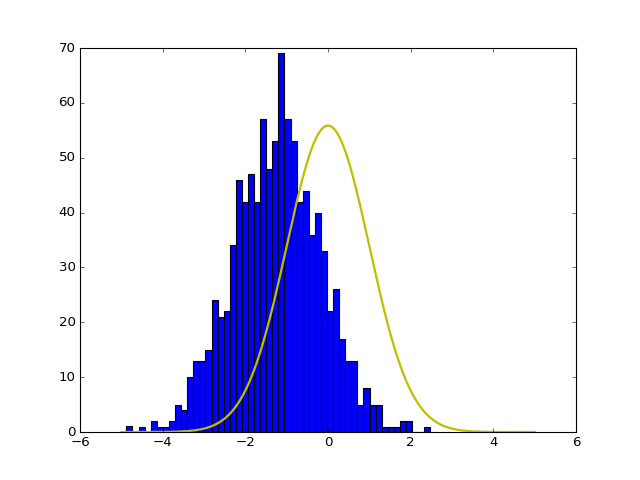

number of signal points: 150 	 number of MC point: 1000 	radius: 0.5


<IPython.core.display.Javascript object>


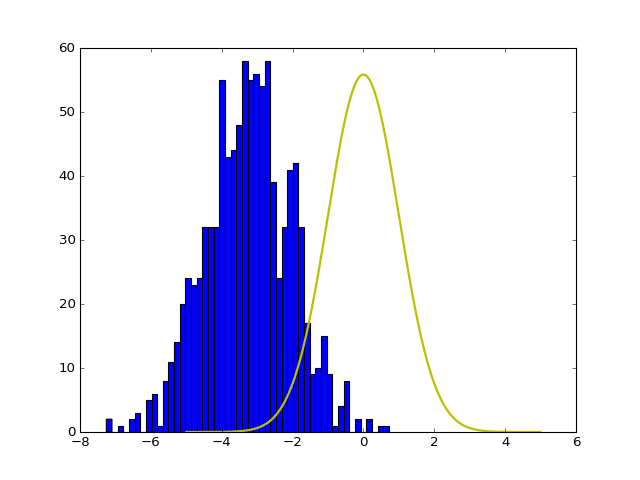

number of signal points: 150 	 number of MC point: 5000 	radius: 0.01


<IPython.core.display.Javascript object>


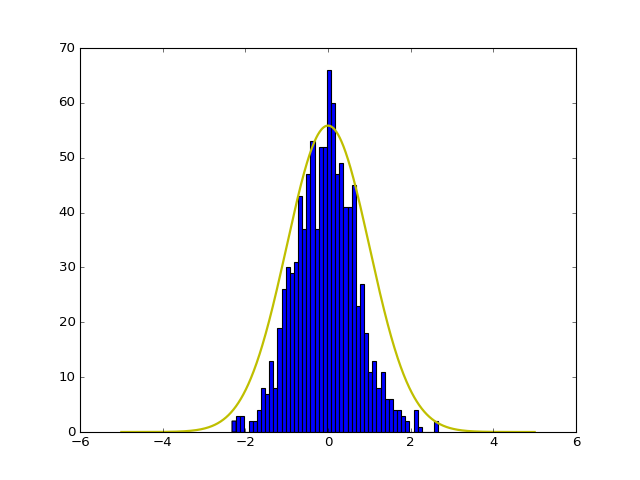

number of signal points: 150 	 number of MC point: 5000 	radius: 0.05


<IPython.core.display.Javascript object>


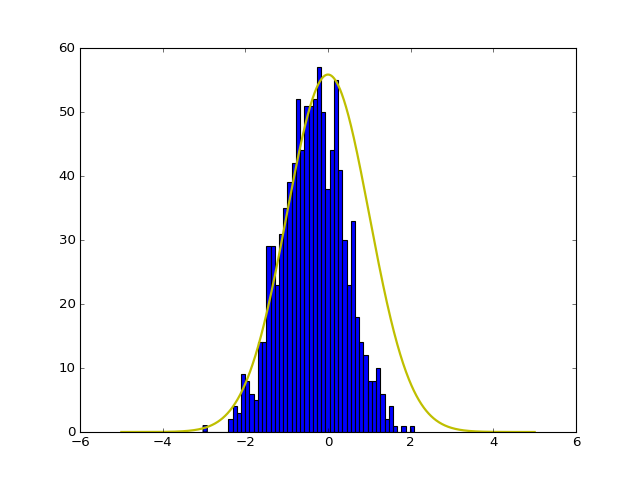

number of signal points: 150 	 number of MC point: 5000 	radius: 0.1


<IPython.core.display.Javascript object>


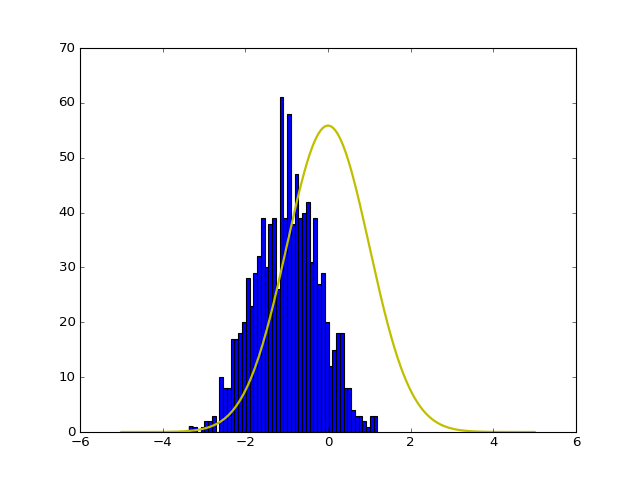

number of signal points: 150 	 number of MC point: 5000 	radius: 0.2


<IPython.core.display.Javascript object>


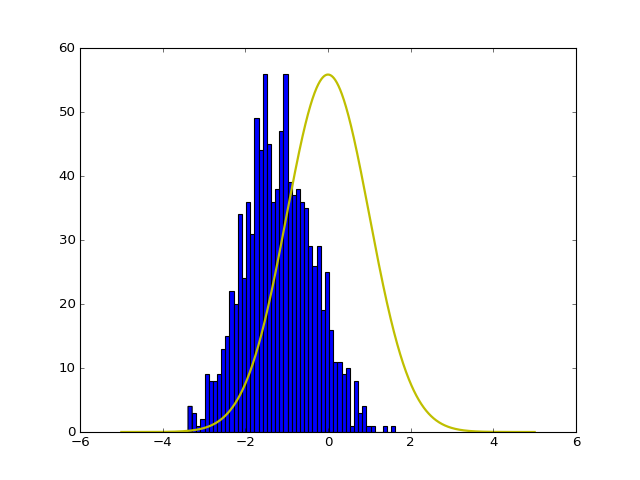

number of signal points: 150 	 number of MC point: 5000 	radius: 0.5


<IPython.core.display.Javascript object>


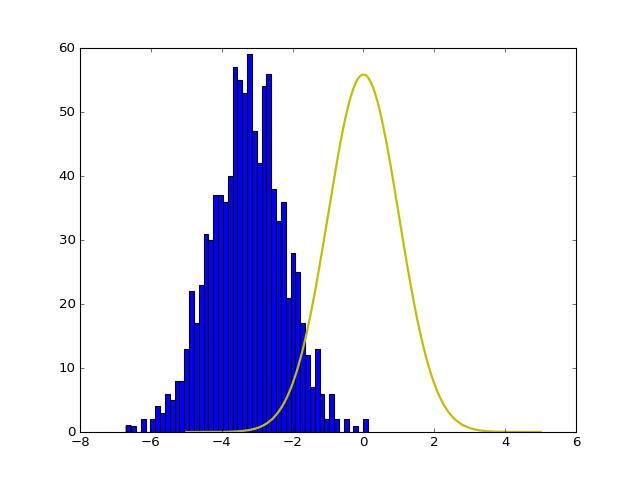

number of signal points: 150 	 number of MC point: 10000 	radius: 0.01


<IPython.core.display.Javascript object>


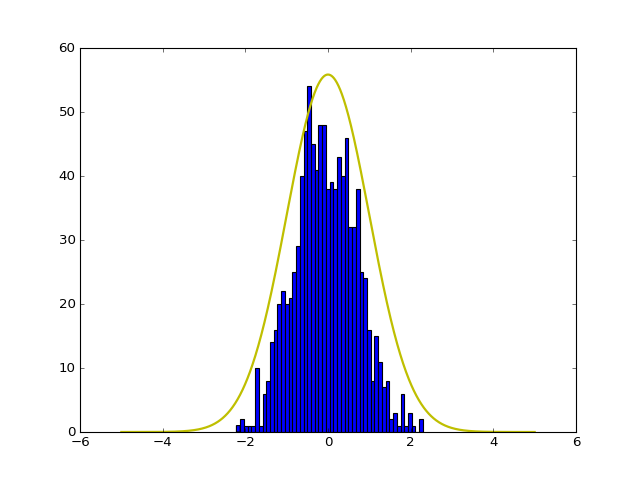

number of signal points: 150 	 number of MC point: 10000 	radius: 0.05


<IPython.core.display.Javascript object>


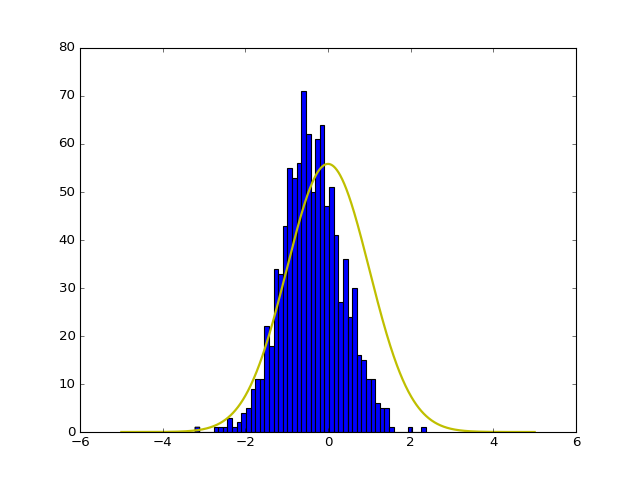

number of signal points: 150 	 number of MC point: 10000 	radius: 0.1


<IPython.core.display.Javascript object>


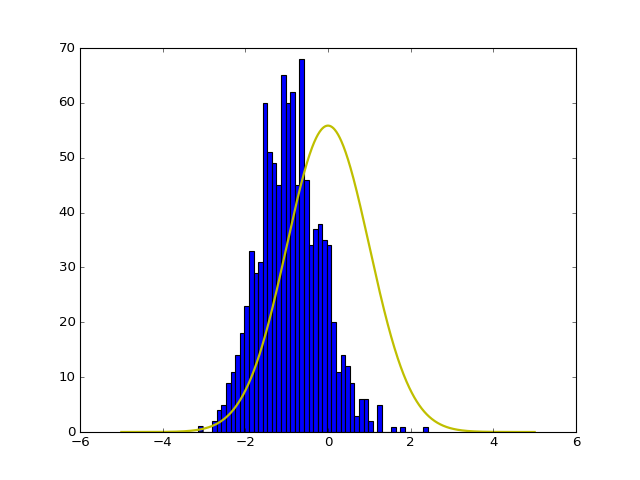

number of signal points: 150 	 number of MC point: 10000 	radius: 0.2


<IPython.core.display.Javascript object>


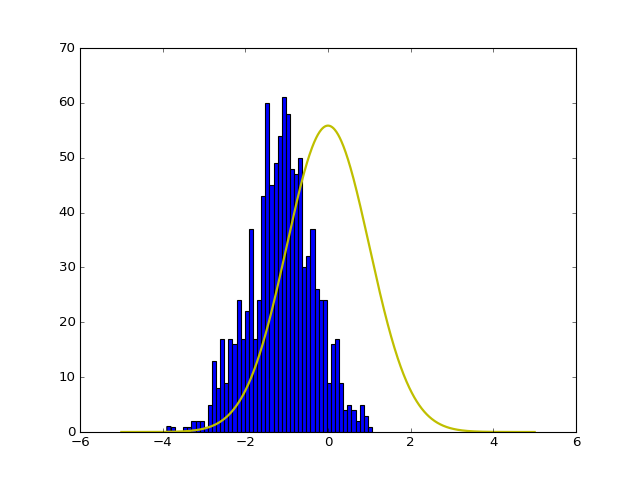

number of signal points: 150 	 number of MC point: 10000 	radius: 0.5


<IPython.core.display.Javascript object>


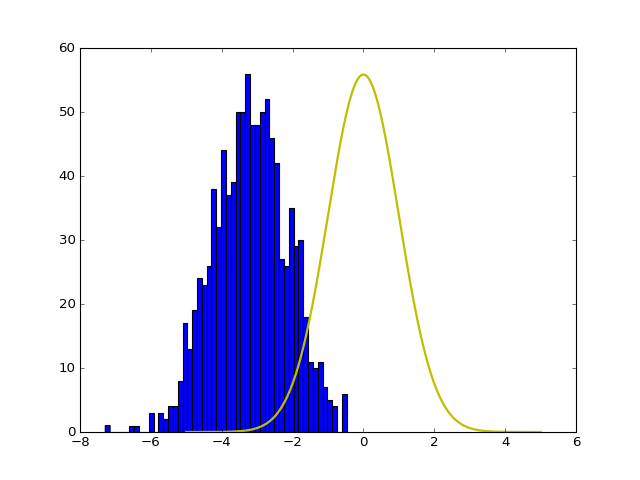

number of signal points: 300 	 number of MC point: 1000 	radius: 0.01


<IPython.core.display.Javascript object>


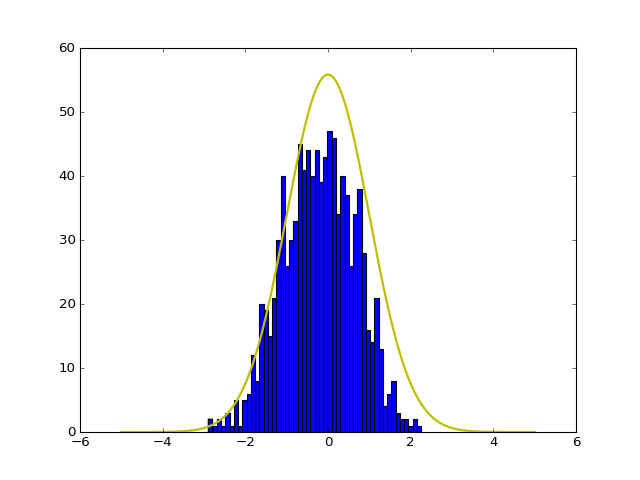

number of signal points: 300 	 number of MC point: 1000 	radius: 0.05


<IPython.core.display.Javascript object>


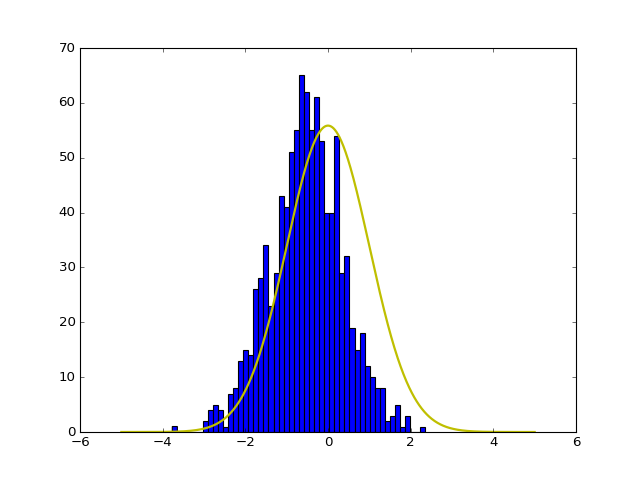

number of signal points: 300 	 number of MC point: 1000 	radius: 0.1


<IPython.core.display.Javascript object>


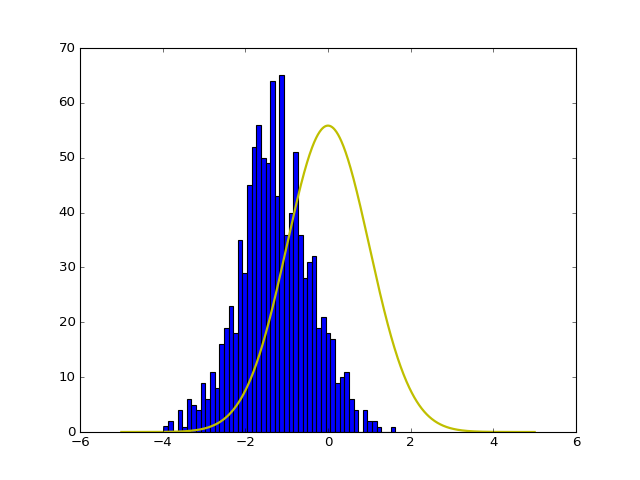

number of signal points: 300 	 number of MC point: 1000 	radius: 0.2


<IPython.core.display.Javascript object>


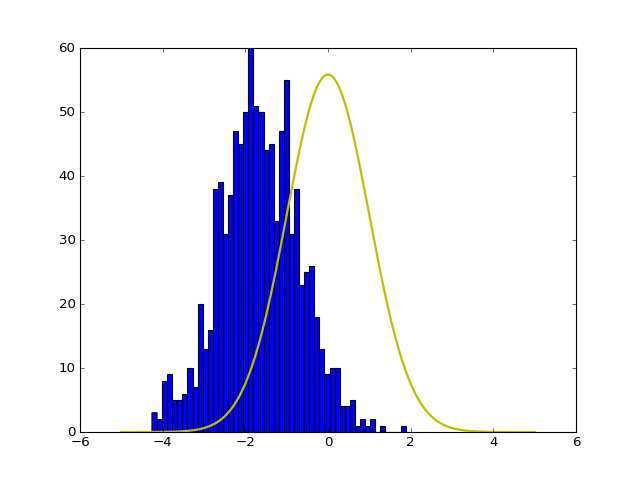

number of signal points: 300 	 number of MC point: 1000 	radius: 0.5


<IPython.core.display.Javascript object>


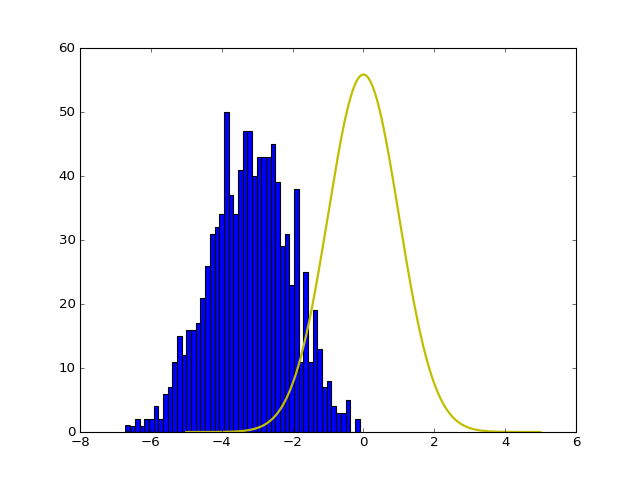

number of signal points: 300 	 number of MC point: 5000 	radius: 0.01


<IPython.core.display.Javascript object>


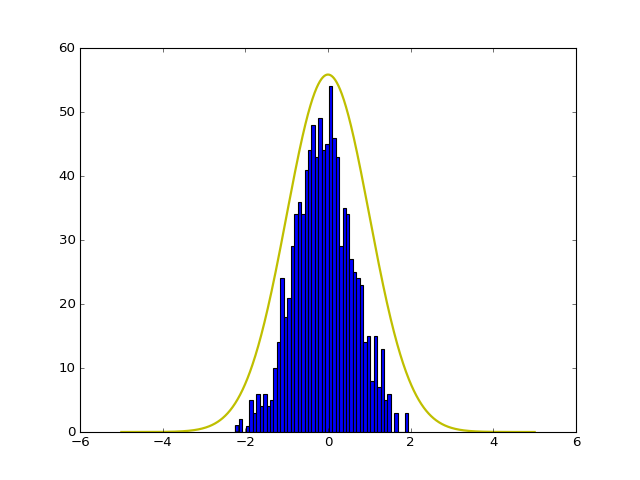

number of signal points: 300 	 number of MC point: 5000 	radius: 0.05


<IPython.core.display.Javascript object>


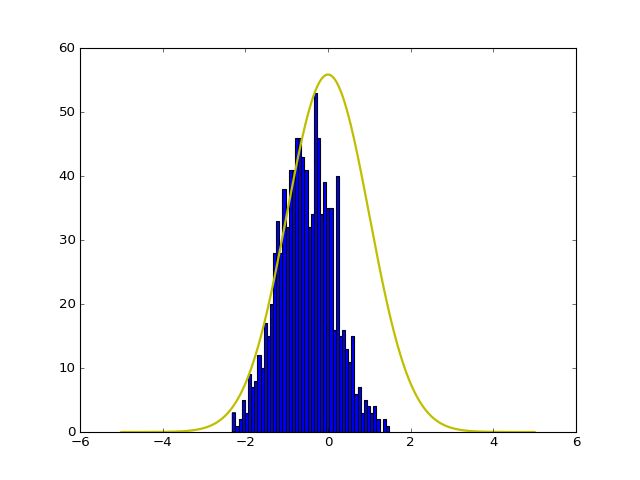

number of signal points: 300 	 number of MC point: 5000 	radius: 0.1


<IPython.core.display.Javascript object>


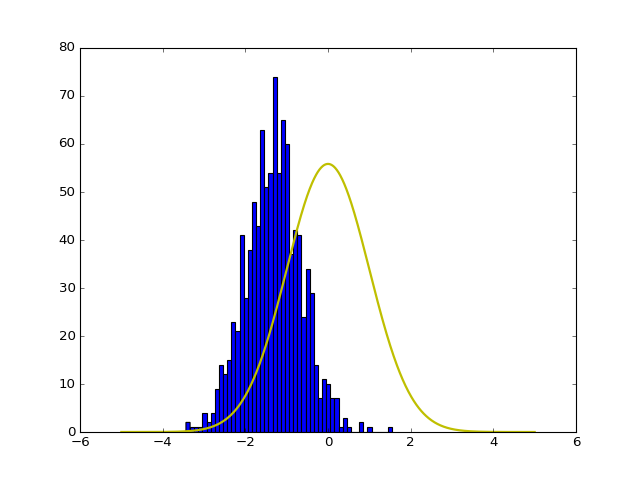

number of signal points: 300 	 number of MC point: 5000 	radius: 0.2


<IPython.core.display.Javascript object>


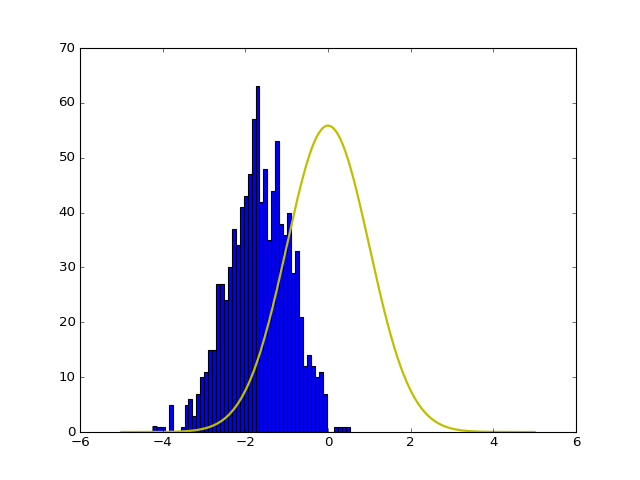

number of signal points: 300 	 number of MC point: 5000 	radius: 0.5


<IPython.core.display.Javascript object>


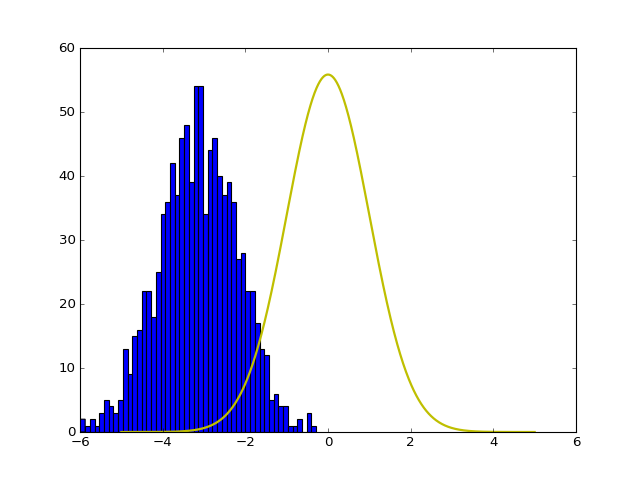

number of signal points: 300 	 number of MC point: 10000 	radius: 0.01


<IPython.core.display.Javascript object>


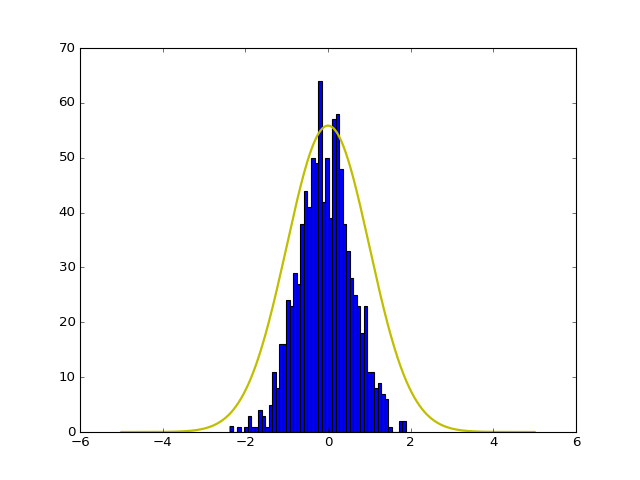

number of signal points: 300 	 number of MC point: 10000 	radius: 0.05


<IPython.core.display.Javascript object>


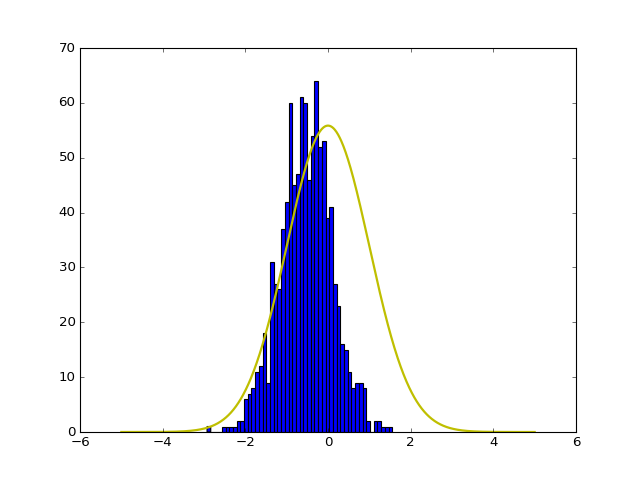

number of signal points: 300 	 number of MC point: 10000 	radius: 0.1


<IPython.core.display.Javascript object>


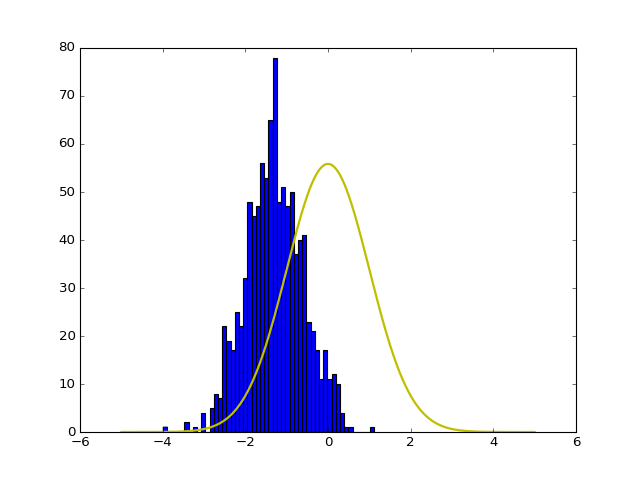

number of signal points: 300 	 number of MC point: 10000 	radius: 0.2


<IPython.core.display.Javascript object>


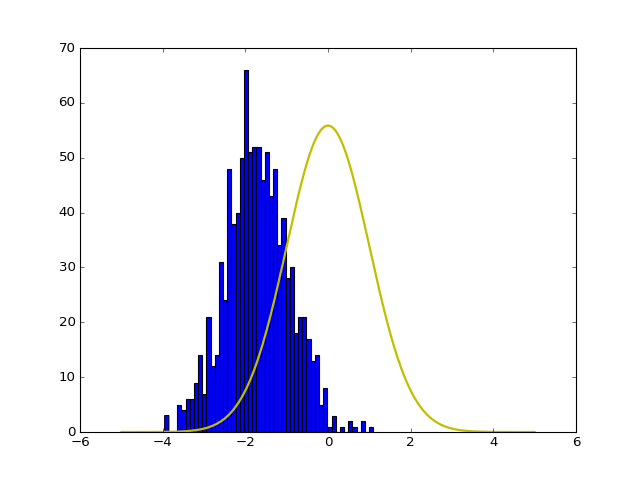

number of signal points: 300 	 number of MC point: 10000 	radius: 0.5


<IPython.core.display.Javascript object>


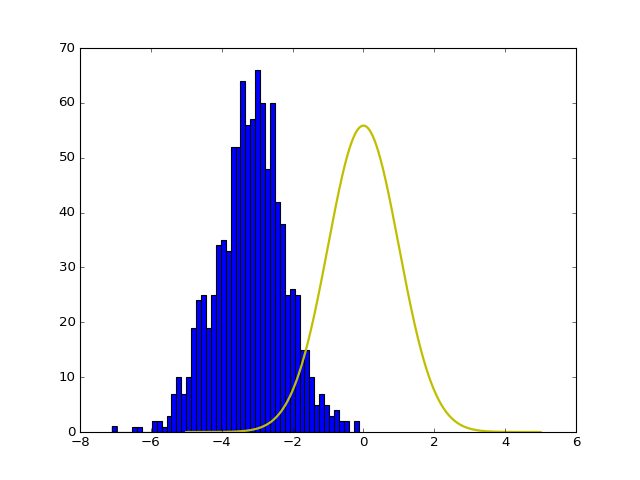

In [45]:
for sig in [50,150,300]:
    for MC in [1000,5000,10000]:
        for rad in [0.01,0.05,0.10,0.20,0.50]:
            print 'number of signal points: %s \t number of MC point: %s \tradius: %s' % (sig,MC,rad)
            pulls,org_vals,fit_vals,fit_uncerts,iteration = calc_pull(1000, sig, MC, rad)
            plt.figure()
            plt.hist(pulls, bins=50)
            x = np.linspace(-5,5,1000)
            y=normal(x,0,1)
            plt.plot(x,(iteration*7/(50))*y,'y-',linewidth=2)



number of signal points: 50 	 number of MC point: 1000 	radius: 0.01


/home/sara/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:80: RuntimeWarning: divide by zero encountered in log


<IPython.core.display.Javascript object>


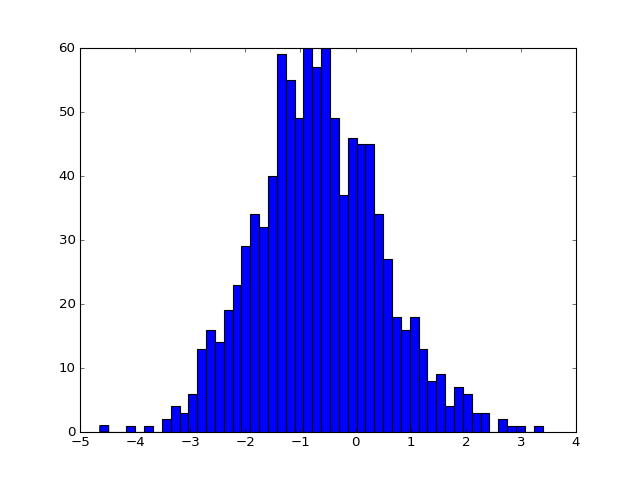

number of signal points: 50 	 number of MC point: 1000 	radius: 0.05


<IPython.core.display.Javascript object>


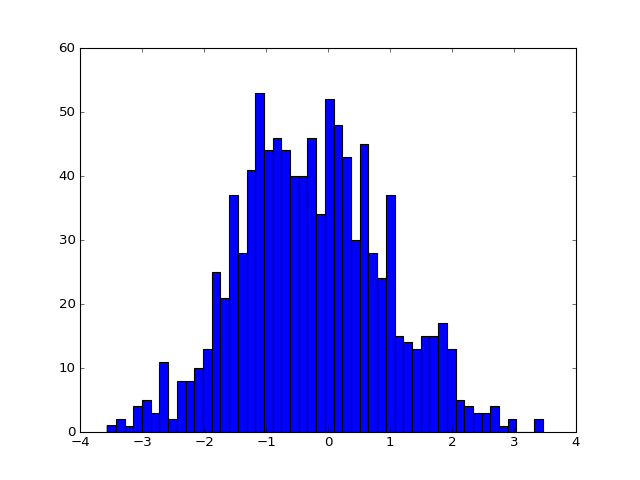

number of signal points: 50 	 number of MC point: 1000 	radius: 0.1


<IPython.core.display.Javascript object>


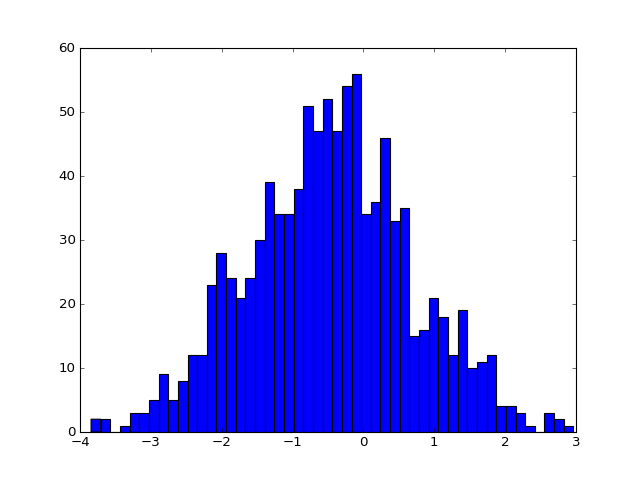

number of signal points: 50 	 number of MC point: 1000 	radius: 0.2


<IPython.core.display.Javascript object>


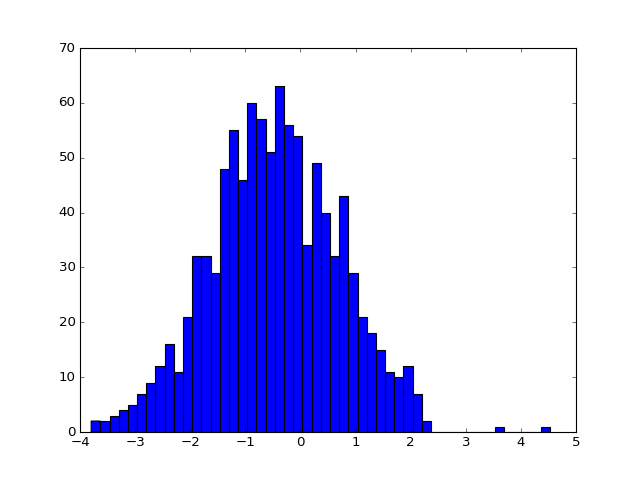

number of signal points: 50 	 number of MC point: 1000 	radius: 0.5


<IPython.core.display.Javascript object>


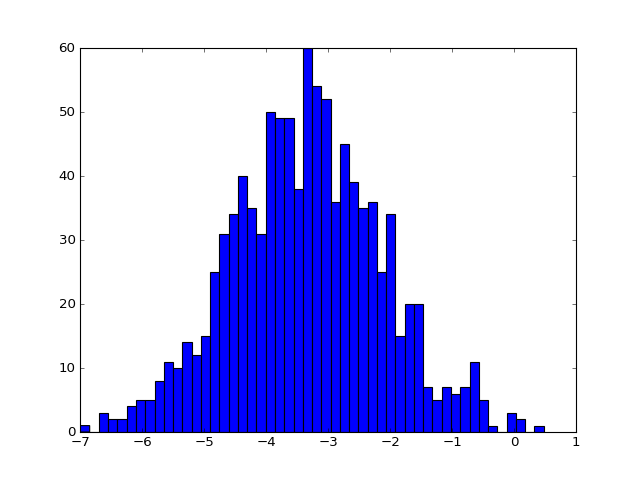

number of signal points: 50 	 number of MC point: 5000 	radius: 0.01


<IPython.core.display.Javascript object>


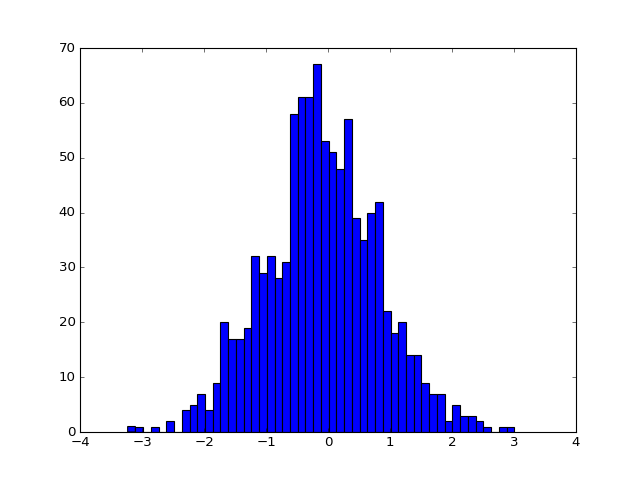

number of signal points: 50 	 number of MC point: 5000 	radius: 0.05


<IPython.core.display.Javascript object>


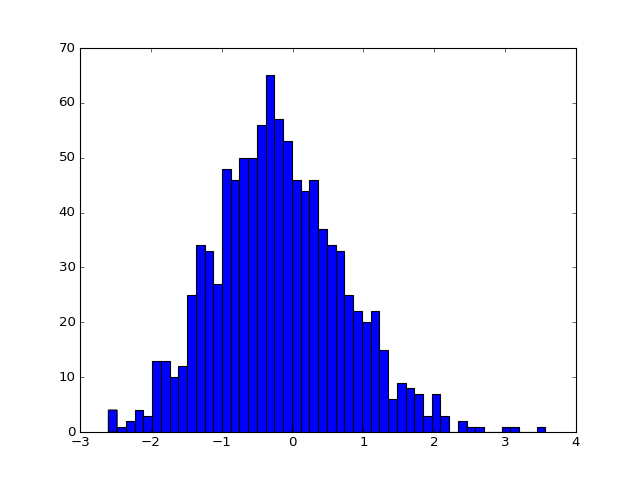

number of signal points: 50 	 number of MC point: 5000 	radius: 0.1


<IPython.core.display.Javascript object>


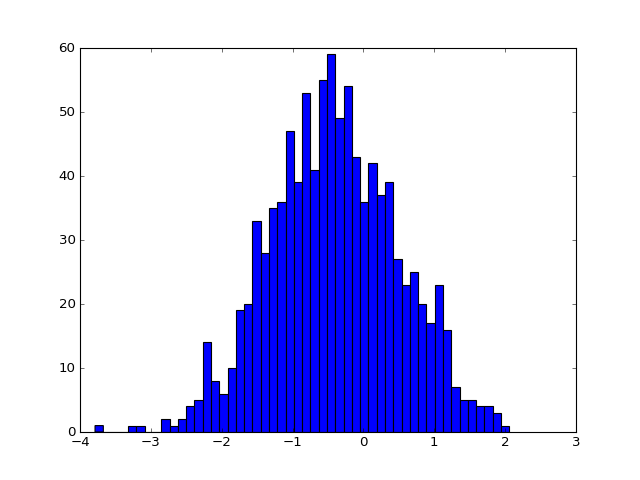

number of signal points: 50 	 number of MC point: 5000 	radius: 0.2


<IPython.core.display.Javascript object>


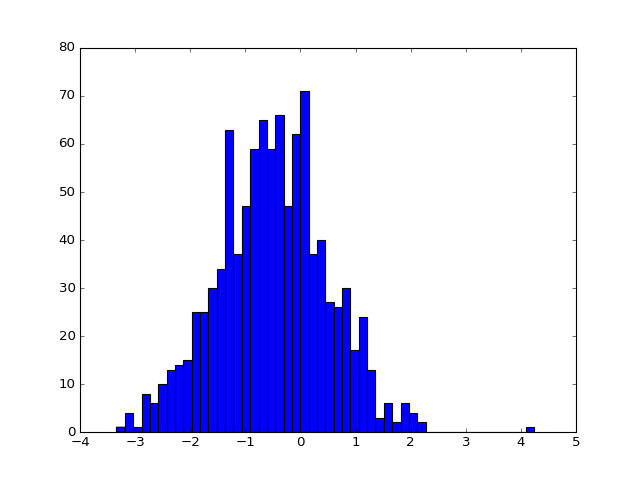

number of signal points: 50 	 number of MC point: 5000 	radius: 0.5


<IPython.core.display.Javascript object>


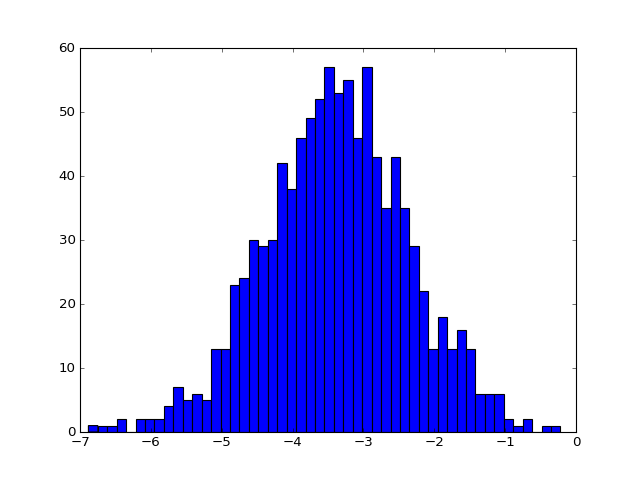

number of signal points: 50 	 number of MC point: 10000 	radius: 0.01


<IPython.core.display.Javascript object>


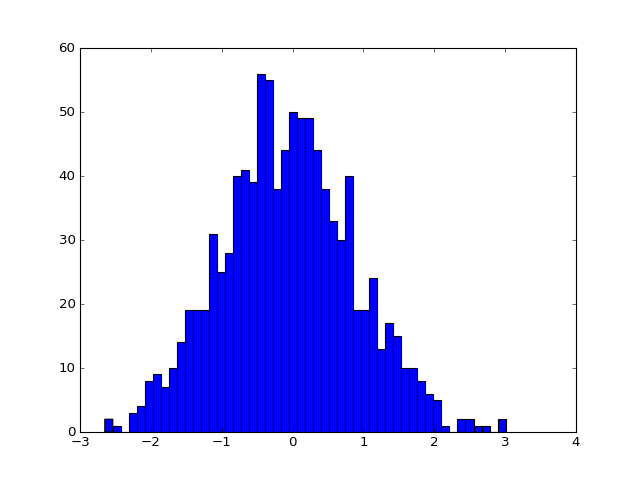

number of signal points: 50 	 number of MC point: 10000 	radius: 0.05


<IPython.core.display.Javascript object>


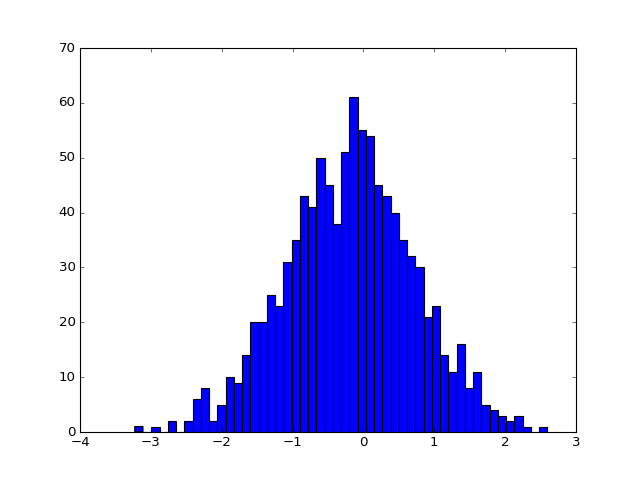

number of signal points: 50 	 number of MC point: 10000 	radius: 0.1


<IPython.core.display.Javascript object>


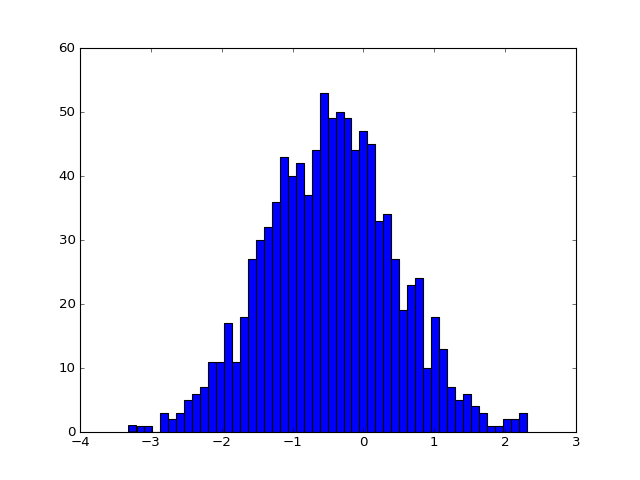

number of signal points: 50 	 number of MC point: 10000 	radius: 0.2


<IPython.core.display.Javascript object>


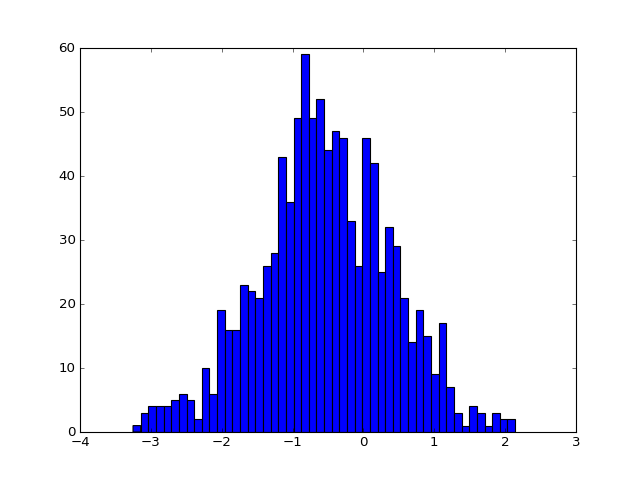

number of signal points: 50 	 number of MC point: 10000 	radius: 0.5


<IPython.core.display.Javascript object>


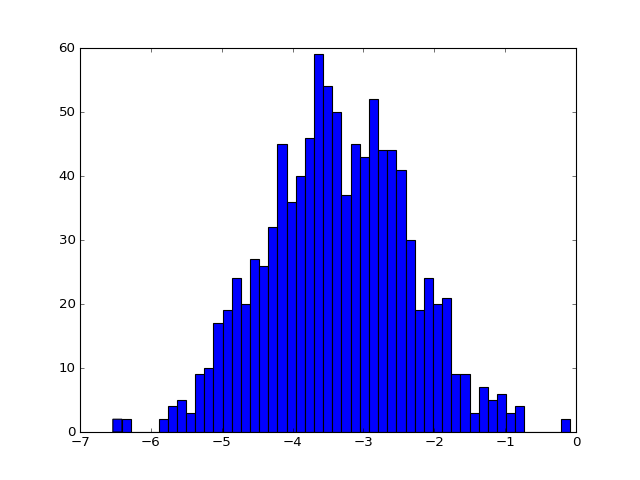

number of signal points: 150 	 number of MC point: 1000 	radius: 0.01


<IPython.core.display.Javascript object>


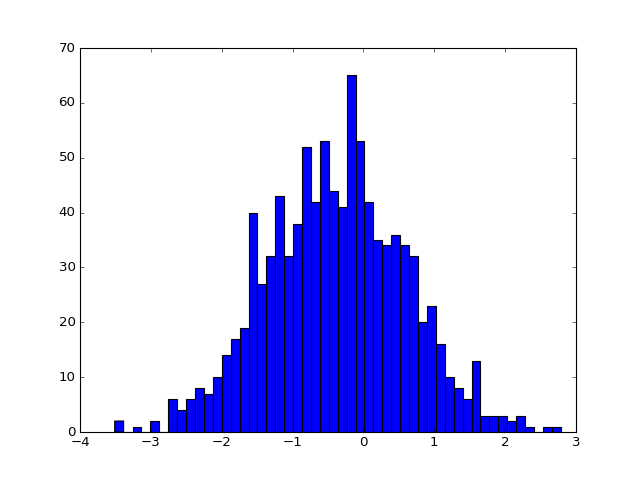

number of signal points: 150 	 number of MC point: 1000 	radius: 0.05


<IPython.core.display.Javascript object>


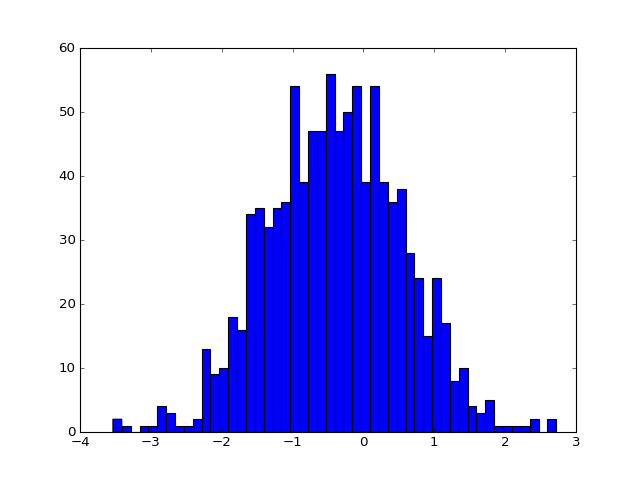

number of signal points: 150 	 number of MC point: 1000 	radius: 0.1


<IPython.core.display.Javascript object>


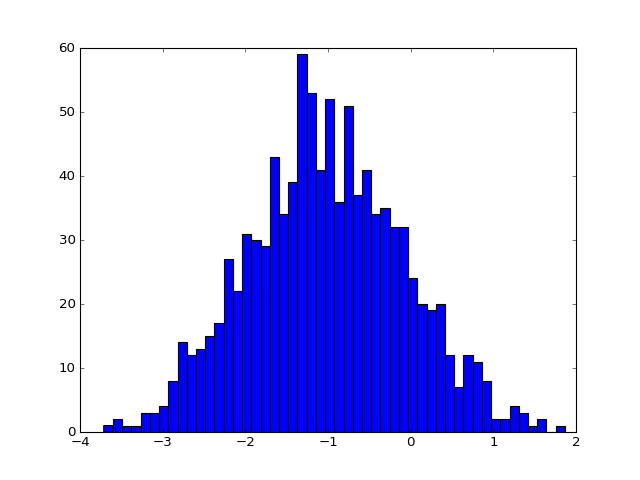

number of signal points: 150 	 number of MC point: 1000 	radius: 0.2


<IPython.core.display.Javascript object>


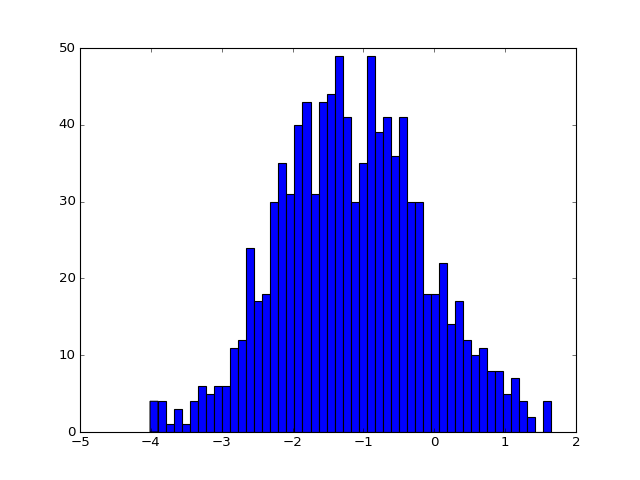

number of signal points: 150 	 number of MC point: 1000 	radius: 0.5


<IPython.core.display.Javascript object>


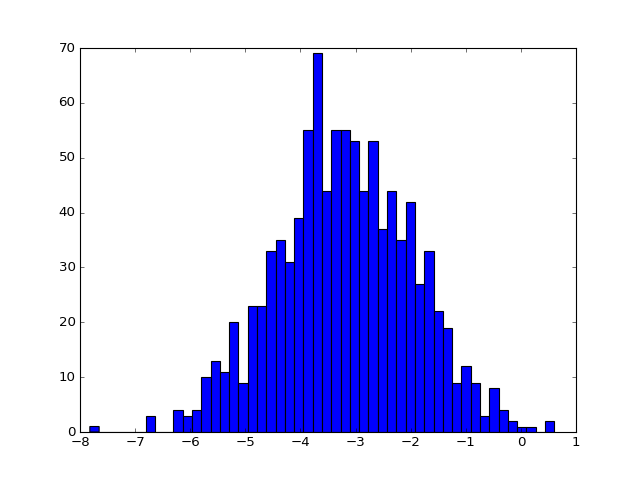

number of signal points: 150 	 number of MC point: 5000 	radius: 0.01


/home/sara/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


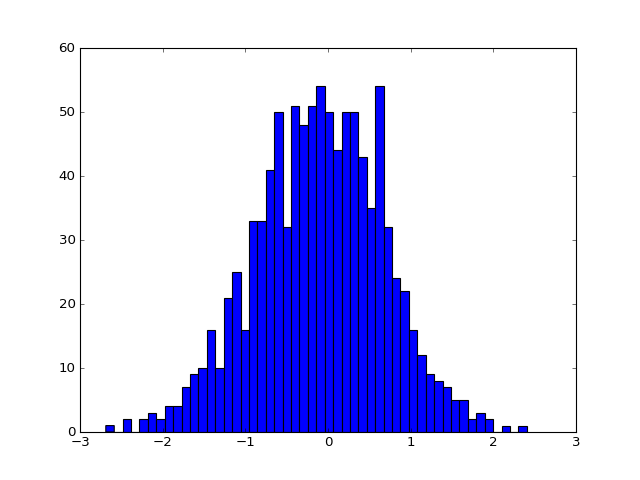

number of signal points: 150 	 number of MC point: 5000 	radius: 0.05


<IPython.core.display.Javascript object>


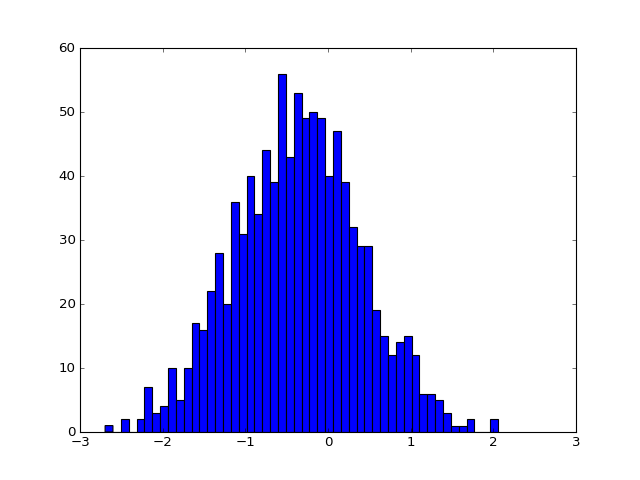

number of signal points: 150 	 number of MC point: 5000 	radius: 0.1


<IPython.core.display.Javascript object>


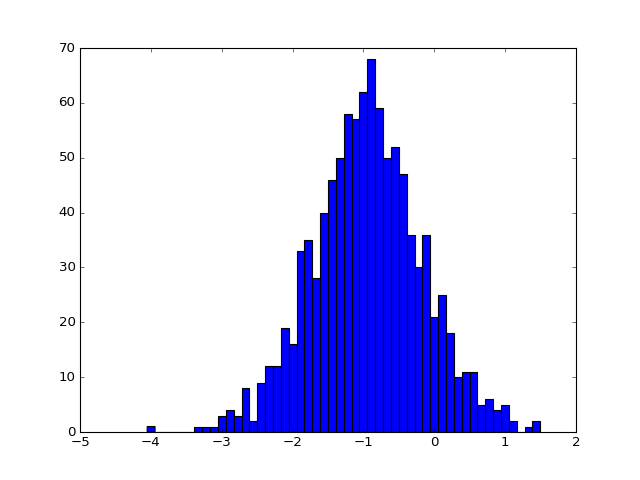

number of signal points: 150 	 number of MC point: 5000 	radius: 0.2


<IPython.core.display.Javascript object>


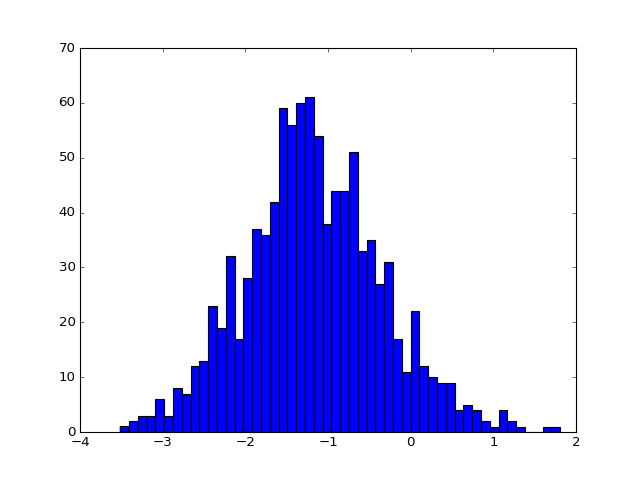

number of signal points: 150 	 number of MC point: 5000 	radius: 0.5


<IPython.core.display.Javascript object>


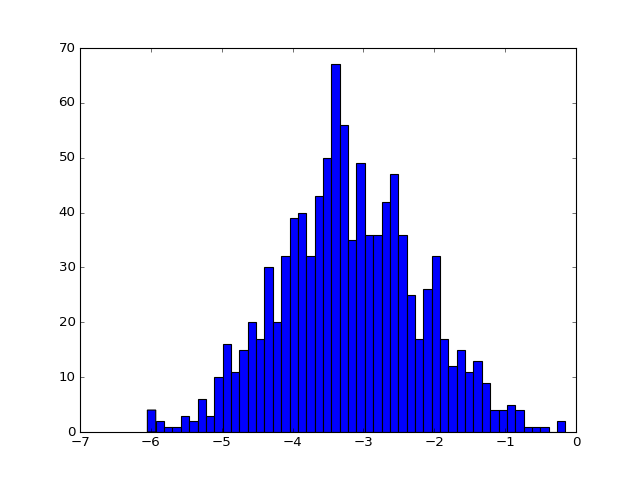

number of signal points: 150 	 number of MC point: 10000 	radius: 0.01


<IPython.core.display.Javascript object>


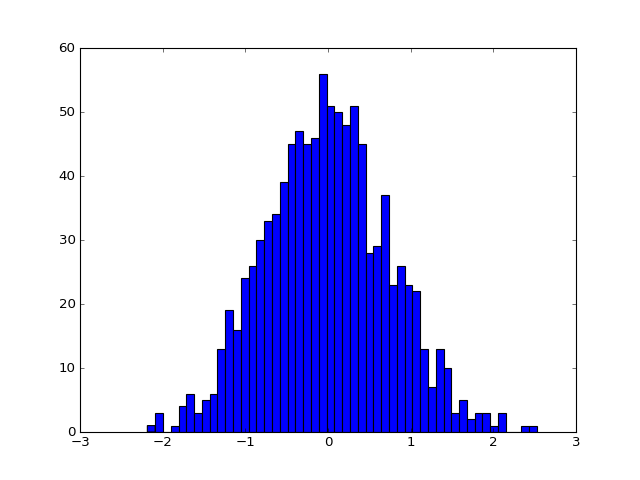

number of signal points: 150 	 number of MC point: 10000 	radius: 0.05


<IPython.core.display.Javascript object>


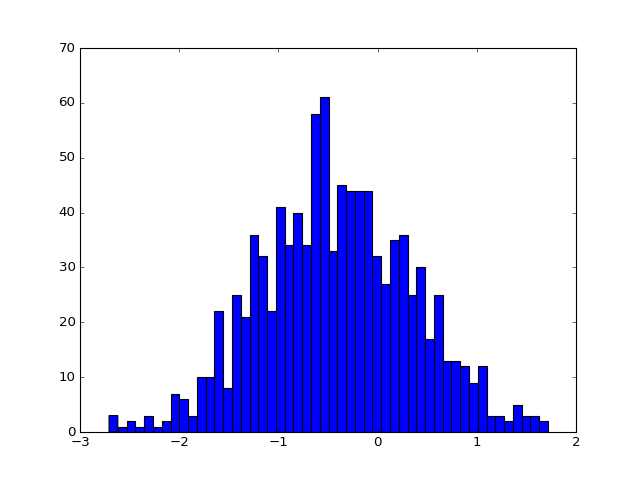

number of signal points: 150 	 number of MC point: 10000 	radius: 0.1


<IPython.core.display.Javascript object>


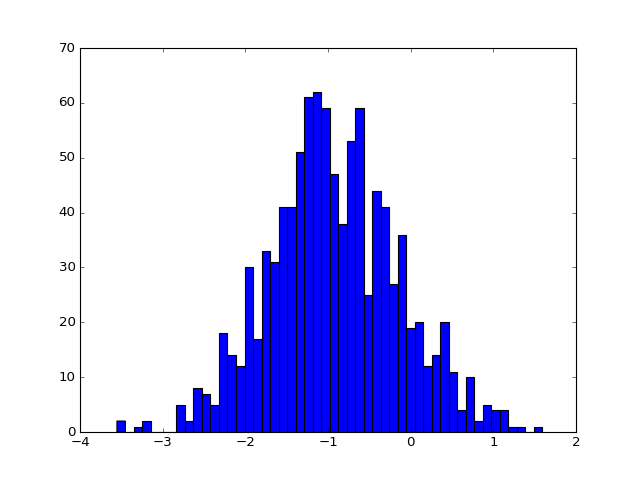

number of signal points: 150 	 number of MC point: 10000 	radius: 0.2


<IPython.core.display.Javascript object>


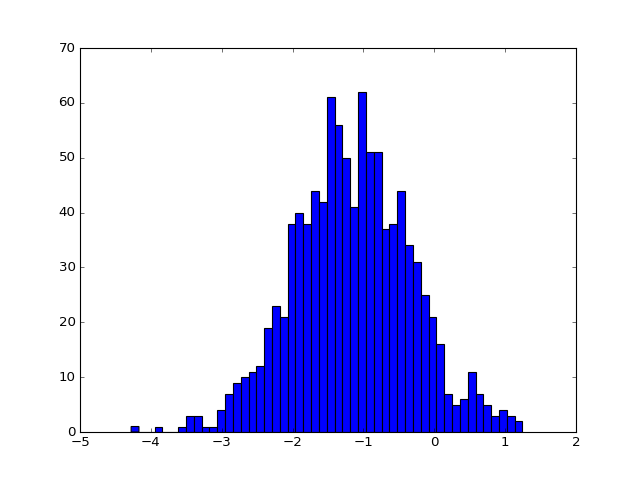

number of signal points: 150 	 number of MC point: 10000 	radius: 0.5


<IPython.core.display.Javascript object>


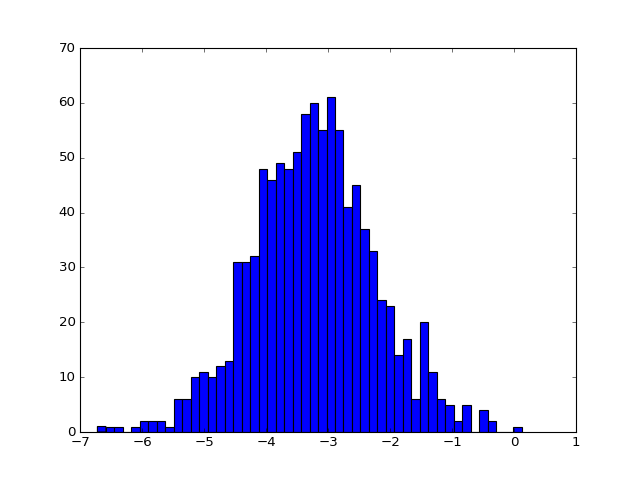

number of signal points: 300 	 number of MC point: 1000 	radius: 0.01


<IPython.core.display.Javascript object>


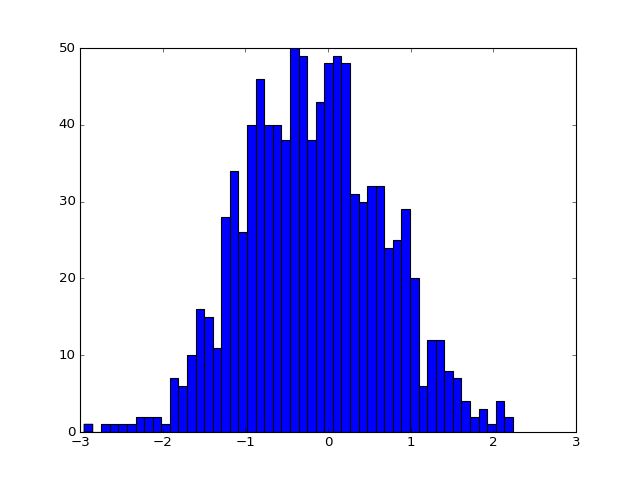

number of signal points: 300 	 number of MC point: 1000 	radius: 0.05


<IPython.core.display.Javascript object>


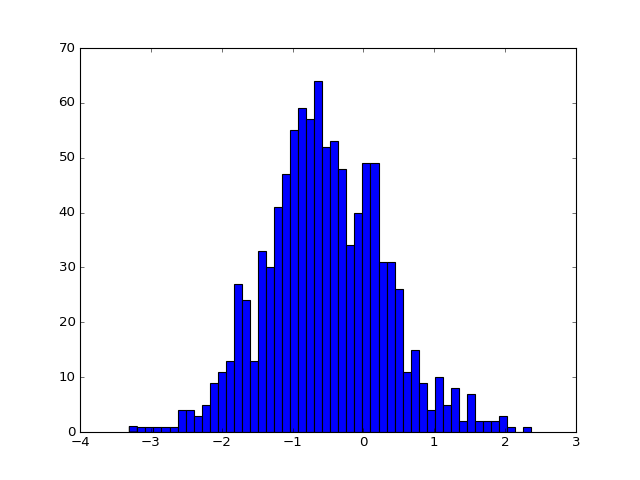

number of signal points: 300 	 number of MC point: 1000 	radius: 0.1


<IPython.core.display.Javascript object>


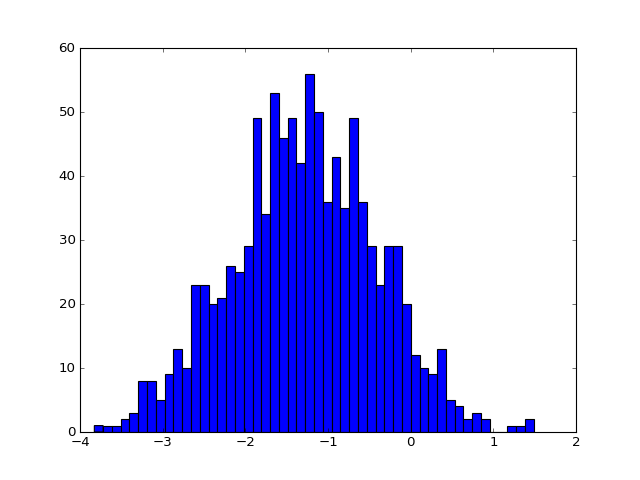

number of signal points: 300 	 number of MC point: 1000 	radius: 0.2


<IPython.core.display.Javascript object>


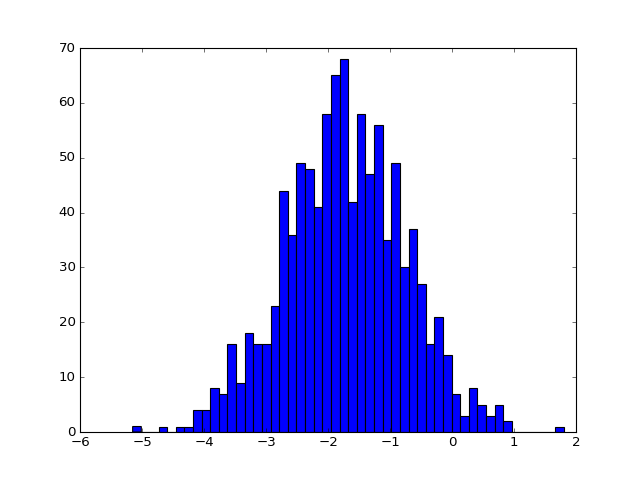

number of signal points: 300 	 number of MC point: 1000 	radius: 0.5


<IPython.core.display.Javascript object>


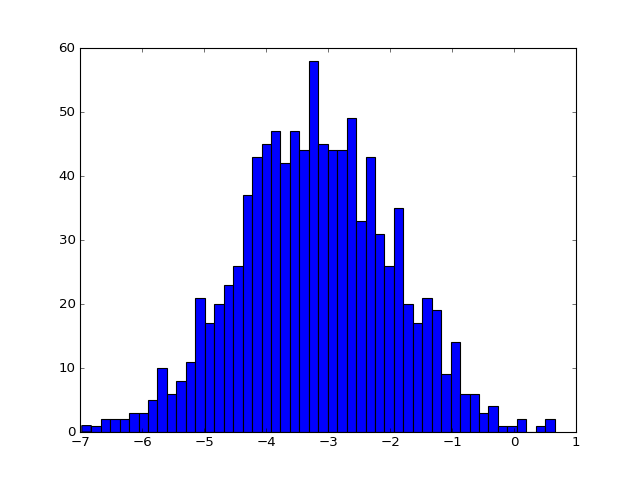

number of signal points: 300 	 number of MC point: 5000 	radius: 0.01


<IPython.core.display.Javascript object>


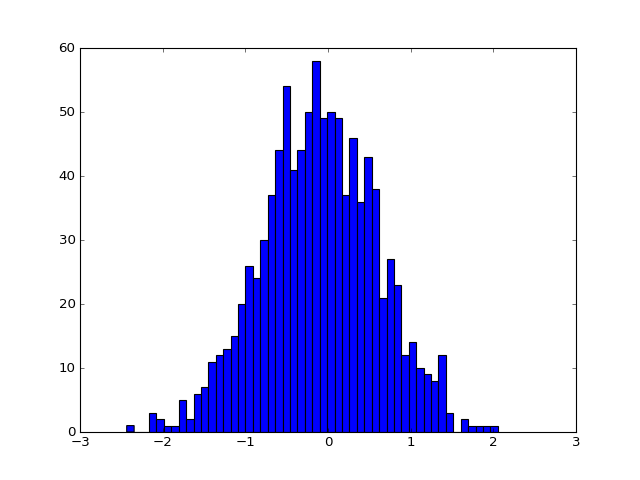

number of signal points: 300 	 number of MC point: 5000 	radius: 0.05


<IPython.core.display.Javascript object>


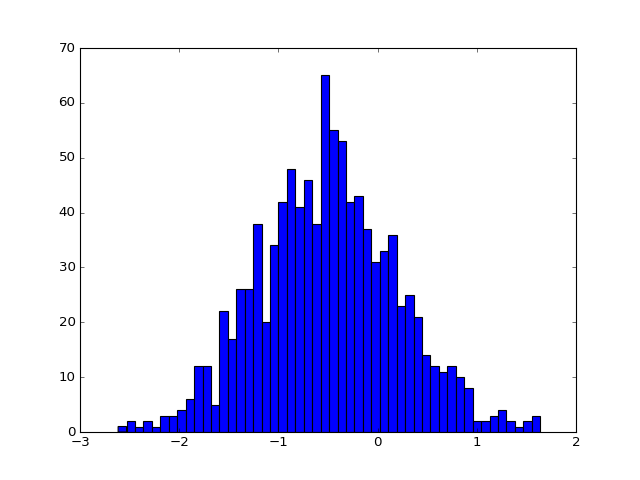

number of signal points: 300 	 number of MC point: 5000 	radius: 0.1


<IPython.core.display.Javascript object>


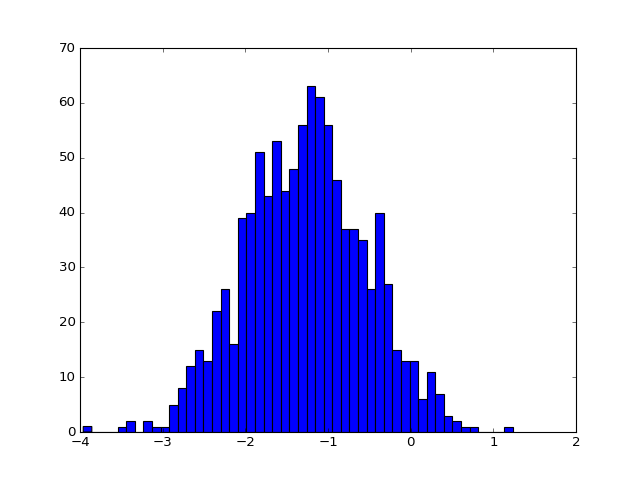

number of signal points: 300 	 number of MC point: 5000 	radius: 0.2


<IPython.core.display.Javascript object>


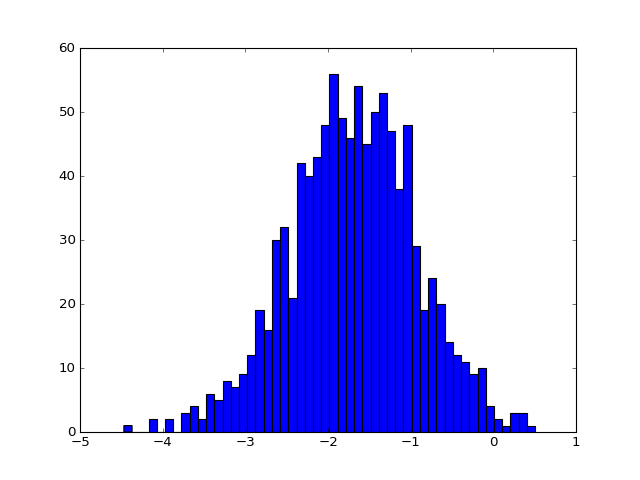

number of signal points: 300 	 number of MC point: 5000 	radius: 0.5


<IPython.core.display.Javascript object>


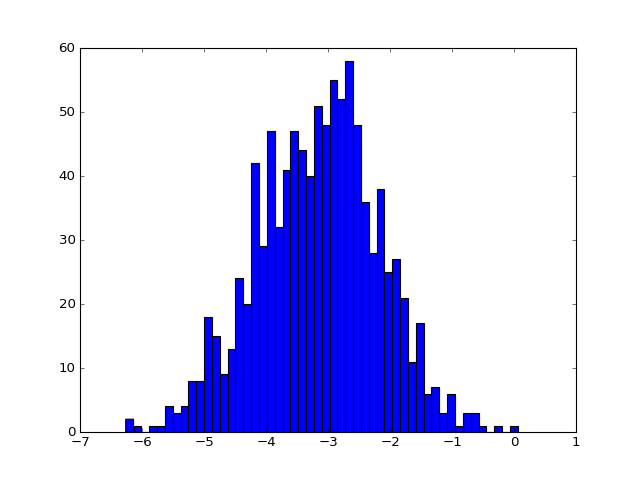

number of signal points: 300 	 number of MC point: 10000 	radius: 0.01


<IPython.core.display.Javascript object>


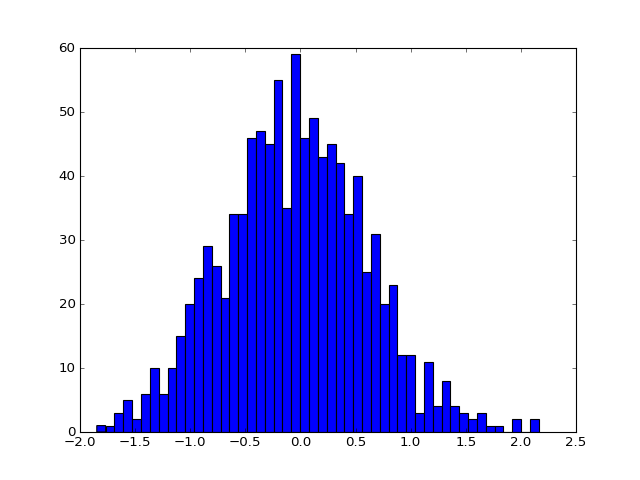

number of signal points: 300 	 number of MC point: 10000 	radius: 0.05


<IPython.core.display.Javascript object>


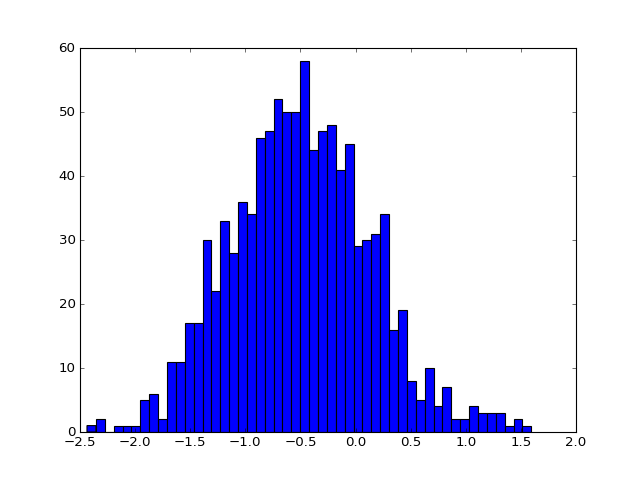

number of signal points: 300 	 number of MC point: 10000 	radius: 0.1


<IPython.core.display.Javascript object>


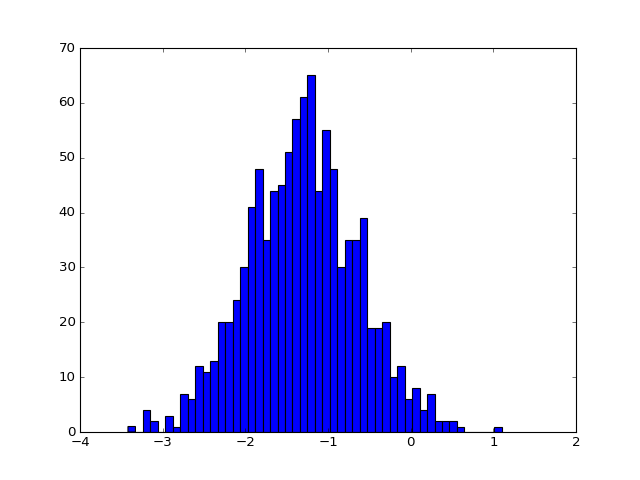

number of signal points: 300 	 number of MC point: 10000 	radius: 0.2


<IPython.core.display.Javascript object>


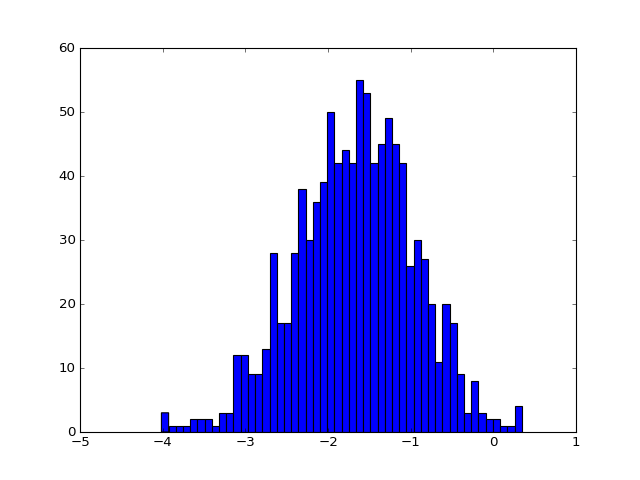

number of signal points: 300 	 number of MC point: 10000 	radius: 0.5


<IPython.core.display.Javascript object>


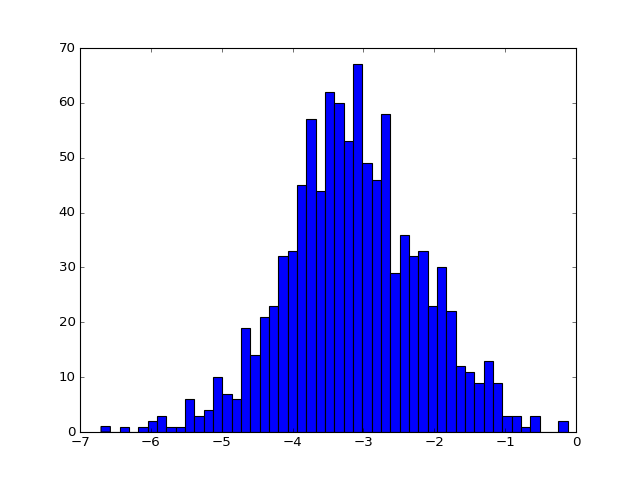

In [12]:
for sig in [50,150,300]:
    for MC in [1000,5000,10000]:
        for rad in [0.01,0.05,0.10,0.20,0.50]:
            print 'number of signal points: %s \t number of MC point: %s \tradius: %s' % (sig,MC,rad)
            pulls,org_vals,fit_vals,fit_uncerts,iteration = calc_pull(1000, sig, MC, rad)
            plt.figure()
            
            plt.hist(pulls, bins=50)



In [ ]:
num_bins=50

plt.figure(figsize=(12,12))
plt.subplot(3,1,1)
plt.hist(pulls,bins=num_bins,range=(-5,5))
x = np.linspace(-5,5,1000)
y=normal(x,0,1)
plt.plot(x,(iteration*7/(num_bins))*y,'y-',linewidth=2)

plt.subplot(3,1,2)
plt.hist(fit_vals,bins=num_bins)  


plt.subplot(3,1,3)
plt.hist(fit_uncerts,bins=num_bins)

In [ ]:
pulls,org_vals,fit_vals,fit_uncerts,iteration = calc_pull(1000)

In [ ]:
num_bins=50

plt.figure(figsize=(12,12))
plt.subplot(3,3,1)
plt.hist(pulls[0],bins=num_bins,range=(-5,5))
x = np.linspace(-5,5,1000)
y=normal(x,0,1)
plt.plot(x,(iteration*10/(num_bins))*y,'y-',linewidth=2)

plt.subplot(3,3,2)
plt.hist(pulls[1],bins=num_bins, range=(-5,5))
plt.plot(x,(iteration*10/(num_bins))*y,'y-',linewidth=2)

plt.subplot(3,3,3)
plt.hist(pulls[2],bins=num_bins, range=(-5, 5))  
plt.plot(x,(iteration*15/(num_bins))*y,'y-',linewidth=2)

plt.subplot(3,3,4)
plt.hist(fit_vals[0],bins=num_bins, range=(10.3,10.5))
plt.subplot(3,3,5)
plt.hist(fit_vals[1],bins=num_bins, range=(0,0.1))    

plt.subplot(3,3,6)
plt.hist(fit_vals[2],bins=num_bins)  

plt.subplot(3,3,7)
plt.hist(fit_uncerts[0],bins=num_bins, range=(0,.01))
plt.subplot(3,3,8)
plt.hist(fit_uncerts[1],bins=num_bins , range=(0,.01))    

plt.subplot(3,3,9)
plt.hist(fit_uncerts[2],bins=num_bins, range=(.01,.02))